# F16 Results

In [1]:
using JLD2
using Plots
using StatsPlots
using Measures

In [2]:
data_path = joinpath(@__DIR__, "..", "data", "f16")
ccp_data = JLD2.load(data_path * "/ccp_data.jld2")["ccp_data"]
ccp_sdp_data = JLD2.load(data_path * "/ccp_sdp_data.jld2")["ccp_sdp_data"]
orthog_data = JLD2.load(data_path * "/orthog_data.jld2")["orthog_data"]
random_data = JLD2.load(data_path * "/random_data.jld2")["random_data"]
problem = ccp_data.problem

┌ Warning: type InputOptimization.SimData does not exist in workspace; reconstructing
└ @ JLD2 /Users/joshuaott/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621
┌ Warning: type InputOptimization.InputOptimizationProblem does not exist in workspace; reconstructing
└ @ JLD2 /Users/joshuaott/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621
┌ Warning: type InputOptimization.SimData does not exist in workspace; reconstructing
└ @ JLD2 /Users/joshuaott/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621
┌ Warning: type InputOptimization.InputOptimizationProblem does not exist in workspace; reconstructing
└ @ JLD2 /Users/joshuaott/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621
┌ Warning: type InputOptimization.SimData does not exist in workspace; reconstructing
└ @ JLD2 /Users/joshuaott/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621
┌ Warning: type InputOptimization.InputOptimizationProblem does no

Reconstruct@InputOptimizationProblem(Any[Random.MersenneTwister(123456, (0, 388806, 366420, 626)), [0.24677429183800115 0.24725645796460244 0.24735450989457144 0.24704070917092824 0.24630115561986404 0.24491895539354366 0.2424871393742893 0.23867097912916382 0.2332398172731278 0.2261263925808417 0.2174684207798668 0.20744551578351825 0.1962875947071057 0.18423656687185538 0.17149796793317526 0.15824896039024222 0.14468145965056842 0.13100858735293797 0.11744810321926956 0.10420395829585678 0.09146412014073865 0.07938571283427495 0.06808813592943984 0.057662282686929855 0.04816661299605567 0.039630082352647485 0.03205860160074439 0.025438079756853086 0.019732157536595997 0.014886756061726184 0.010842265448506748 0.00753743254773034 0.00491147959988891 0.002905437426182131 0.0014628145345526487 0.0005302998042764807 5.811133368320059e-5 0.0 0.0003133468069976473 0.0009591343241681173 0.0019017948512511345 0.0034438205271170525 0.006740818737366009 0.011759926878715911 0.01808553203449130

## Objectives and Runtime

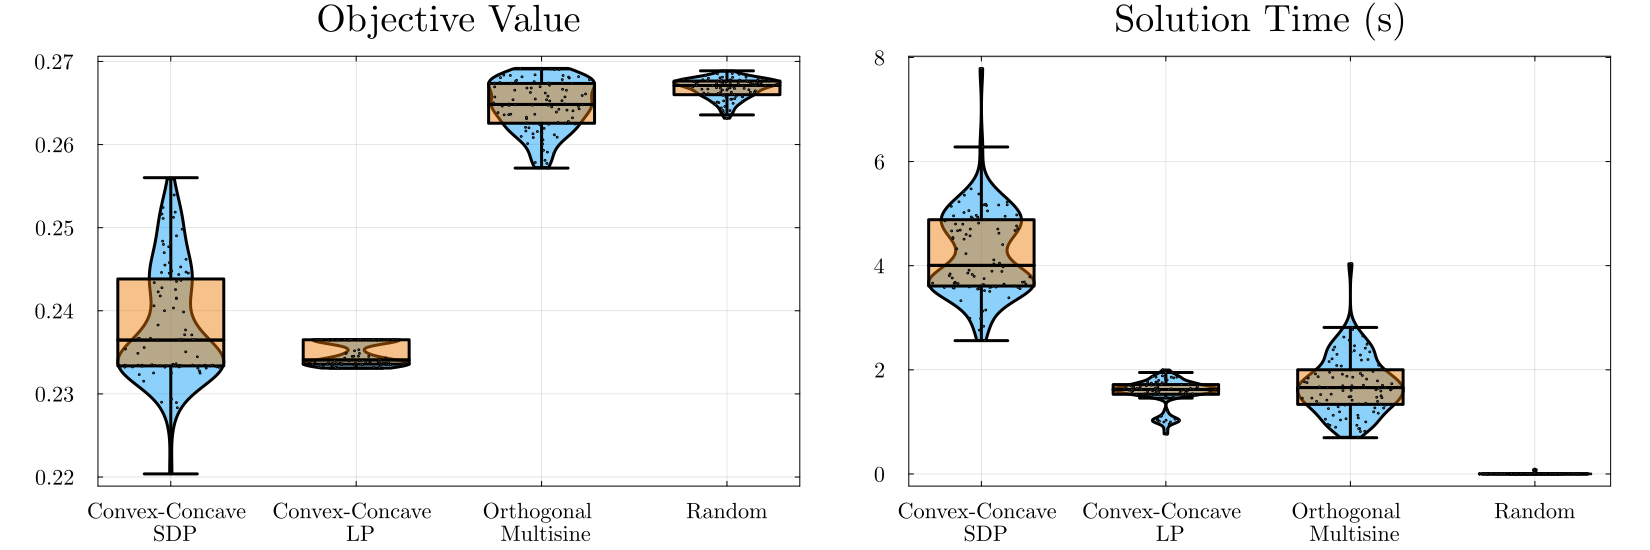

In [33]:
# scaled data
theme(:default)
default(titlefont=font(24, "Computer Modern"))
default(guidefont=font(22, "Computer Modern"))
default(tickfont=font(14, "Computer Modern"))
default(legendfont=font(12, "Computer Modern"))
default(linewidth=3)


ccp_objs = ccp_data.unscaled_objectives
ccp_solve_time = ccp_data.runtimes
ccp_sdp_objs = ccp_sdp_data.unscaled_objectives
ccp_sdp_solve_time = ccp_sdp_data.runtimes
om_objs = orthog_data.unscaled_objectives
om_solve_time = orthog_data.runtimes
random_objs = random_data.unscaled_objectives
random_solve_time = random_data.runtimes

fillalpha = 0.45
point_color = :gray74
violin_color = 1
box_color = :darkorange2
markersize = 1
violin(["Convex-Concave \n SDP"], ccp_sdp_objs, label="", legend=false, fillalpha=fillalpha, color=violin_color)
boxplot!(["Convex-Concave \n SDP"], ccp_sdp_objs, label="Convex-Concave SDP", fillalpha=fillalpha, color=box_color, linecolor=:black, outliers = false)
dotplot!(["Convex-Concave \n SDP"], ccp_sdp_objs, label="", color=point_color, markersize=markersize)
violin!(["Convex-Concave \n LP"], ccp_objs, label="", legend=false, fillalpha=fillalpha, color=violin_color)
boxplot!(["Convex-Concave \n LP"], ccp_objs, label="Convex-Concave", fillalpha=fillalpha, color=box_color, linecolor=:black, outliers = false)
dotplot!(["Convex-Concave \n LP"], ccp_objs, label="Data Points", color=point_color, markersize=markersize)
violin!(["Orthogonal \n Multisine"], om_objs,  label="", title="Objective Value", fillalpha=fillalpha, color=violin_color)
boxplot!(["Orthogonal \n Multisine"], om_objs, label="Orthogonal Multisine", title="Objective Value", fillalpha=fillalpha, color=box_color, linecolor=:black, outliers = false)
dotplot!(["Orthogonal \n Multisine"], om_objs, label="", title="Objective Value", color=point_color, markersize=markersize)
violin!(["Random"], random_objs, label="", fillalpha=fillalpha, color=violin_color)
boxplot!(["Random"], random_objs, label="Random", fillalpha=fillalpha, color=box_color, linecolor=:black, outliers = false)
plt1 = dotplot!(["Random"], random_objs, label="", color=point_color, markersize=markersize)

violin(["Convex-Concave \n SDP"], ccp_sdp_solve_time, label="Convex-Concave SDP", fillalpha=fillalpha, color=violin_color)
boxplot!(["Convex-Concave \n SDP"], ccp_sdp_solve_time, label="Convex-Concave SDP", fillalpha=fillalpha, color=box_color, linecolor=:black, outliers = false)
dotplot!(["Convex-Concave \n SDP"], ccp_sdp_solve_time, label="Convex-Concave SDP", color=point_color, markersize=markersize)
violin!(["Convex-Concave \n LP"], ccp_solve_time, label="Convex-Concave", legend=false, fillalpha=fillalpha, color=violin_color)
boxplot!(["Convex-Concave \n LP"], ccp_solve_time, label="Convex-Concave", legend=false, fillalpha=fillalpha, color=box_color, linecolor=:black, outliers = false)
dotplot!(["Convex-Concave \n LP"], ccp_solve_time, label="Convex-Concave", legend=false, color=point_color, markersize=markersize)
violin!(["Orthogonal \n Multisine"], om_solve_time, label="Orthogonal Multisine", title="Solution Time (s)", fillalpha=fillalpha, color=violin_color)
boxplot!(["Orthogonal \n Multisine"], om_solve_time, label="Orthogonal Multisine", title="Solution Time (s)", fillalpha=fillalpha, color=box_color, linecolor=:black, outliers = false)
dotplot!(["Orthogonal \n Multisine"], om_solve_time, label="Orthogonal Multisine", title="Solution Time (s)", color=point_color, markersize=markersize)
violin!(["Random"], random_solve_time, label="Random", fillalpha=fillalpha, color=violin_color)
boxplot!(["Random"], random_solve_time, label="Random", fillalpha=fillalpha, color=box_color, linecolor=:black, outliers = false)
plt2 = dotplot!(["Random"], random_solve_time, label="Random", color=point_color, markersize=markersize)

plot(plt1, plt2, layout=(1, 2), size=(1650, 550), margin=8mm, framestyle=:box)
savefig("../figures/f16/obj_time.pdf")
plot!()


## Control Inputs

In [20]:
theme(:default)
default(titlefont=font(24, "Computer Modern"))
default(guidefont=font(22, "Computer Modern"))
default(tickfont=font(14, "Computer Modern"))
default(legendfont=font(12, "Computer Modern"))
default(linewidth=3)


# scaled data
data = Dict("Convex-Concave SDP" => ccp_sdp_data, "Convex-Concave LP" => ccp_data, "Orthogonal Multisine" => orthog_data, "Random" => random_data)
control_labels = ["Throttle (%)", "Elevator (°)", "Aileron (°)", "Rudder (°)"]
ylims = [(problem.safe_bounds_unscaled[problem.n+i, 1], problem.safe_bounds_unscaled[problem.n+i, 2]) for i in 1:problem.m]
# idx_plt = 25

for idx_plt in 1:100
    plts = []

    for i in 1:problem.m
        for method in ["Convex-Concave SDP", "Convex-Concave LP", "Orthogonal Multisine", "Random"]
            U = data[method].Zs[idx_plt][problem.n+1:end, :]
            times = problem.Δt * (0:size(U, 2)-1)
            plt = i == 1 ? plot(times, U[i, :], label=method, legend=false, title=method) : plot(times, U[i, :], label=method, legend=false)
            i == 4 ? plot!(xlabel="Time (s)") : nothing
            method == "Convex-Concave SDP" ? plot!(ylabel=control_labels[i]) : nothing
            plot!(ylims=ylims[i])
            push!(plts, plt)
        end
    end

    plot(plts..., layout=(4, 4), size=(2000, 1000), margin=10mm, framestyle=:box, widen=false)
    savefig("/Users/joshuaott/Downloads/control_outputs_$(idx_plt).pdf")
end

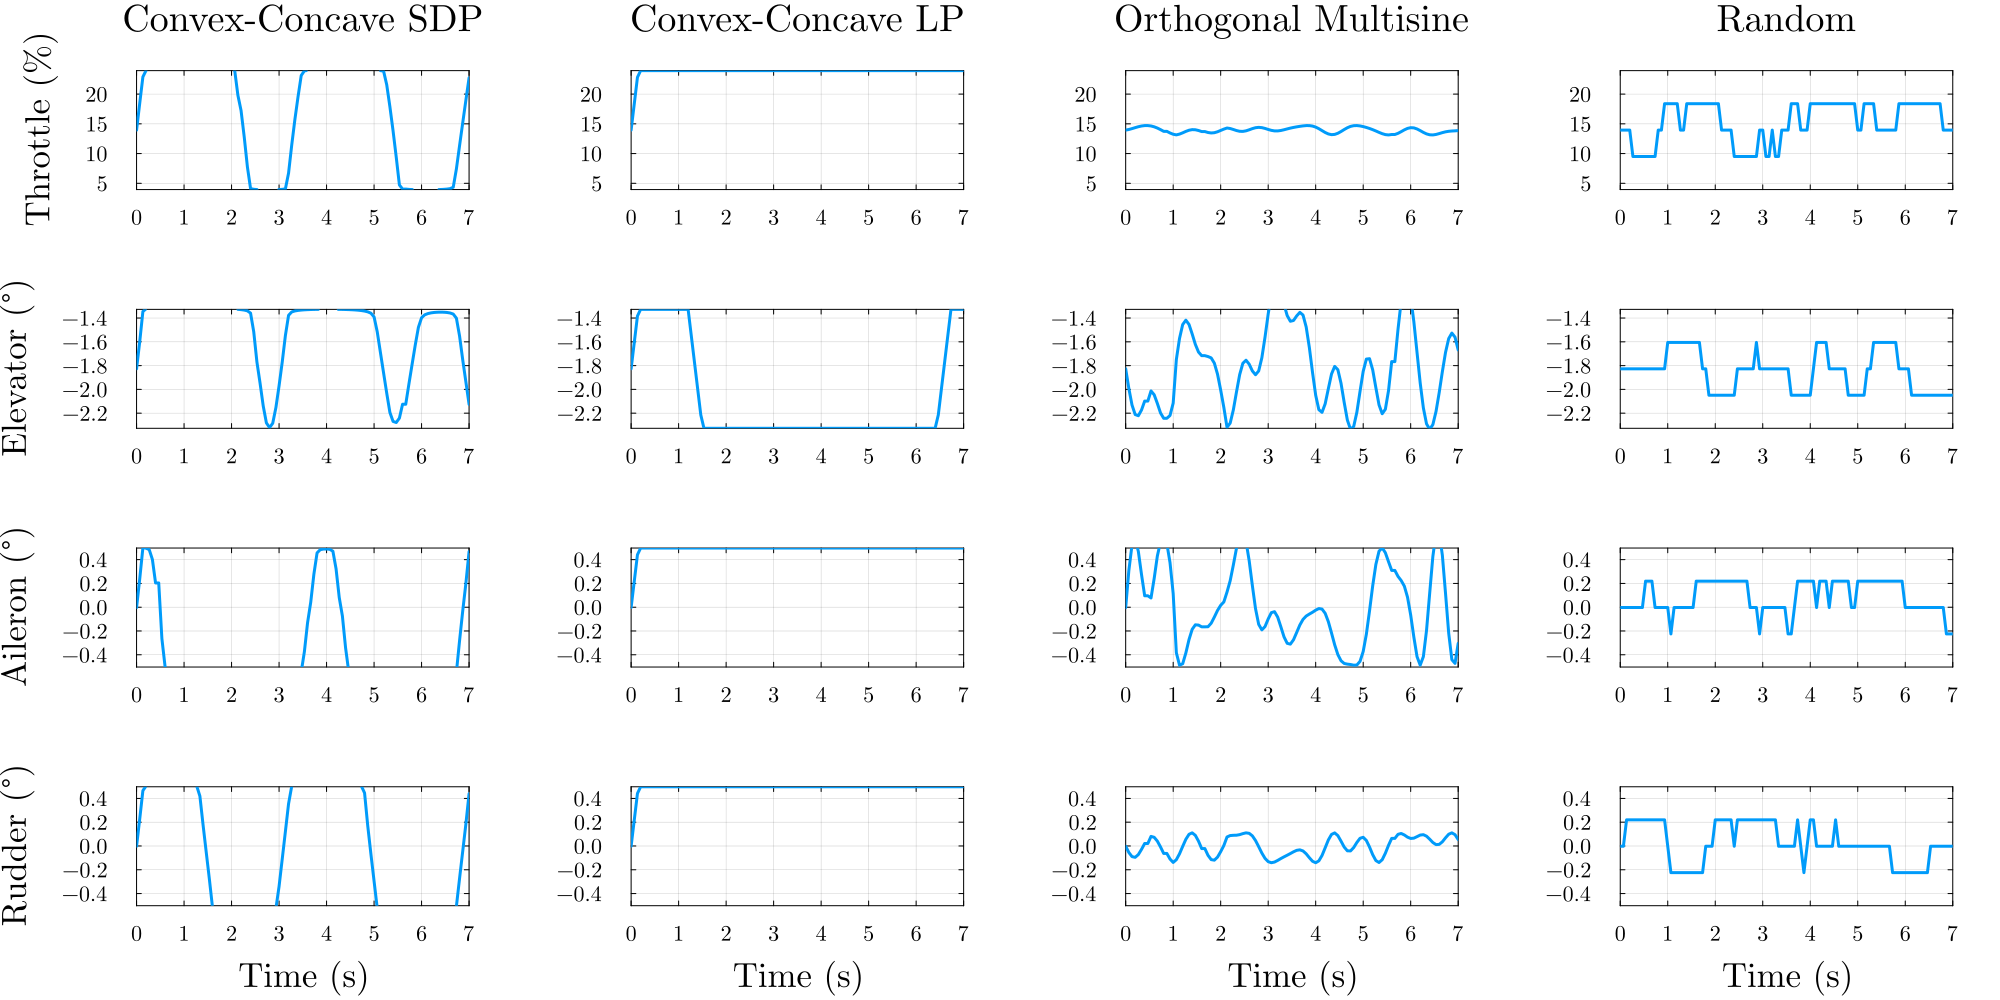

In [32]:
# Example control outputs for each of the methods. This should be a 4x3 plot 

plts = []
data = Dict("Convex-Concave SDP" => ccp_sdp_data, "Convex-Concave LP" => ccp_data, "Orthogonal Multisine" => orthog_data, "Random" => random_data)
control_labels = ["Throttle (%)", "Elevator (°)", "Aileron (°)", "Rudder (°)"]
ylims = [(problem.safe_bounds_unscaled[problem.n+i, 1], problem.safe_bounds_unscaled[problem.n+i, 2]) for i in 1:problem.m]
idx_plt = 62
for i in 1:problem.m
    for method in ["Convex-Concave SDP", "Convex-Concave LP", "Orthogonal Multisine", "Random"]
        U = data[method].Zs[idx_plt][problem.n+1:end, :]
        times = problem.Δt * (0:size(U, 2)-1)
        plt = i == 1 ? plot(times, 100 .* U[i, :], label=method, legend=false, title=method) : plot(times, U[i, :], label=method, legend=false)
        i == 4 ? plot!(xlabel="Time (s)") : nothing
        method == "Convex-Concave SDP" ? plot!(ylabel=control_labels[i]) : nothing
        i == 1 ? plot!(ylims=ylims[i] .*100) : plot!(ylims=ylims[i])
        push!(plts, plt)
    end
end

plot(plts..., layout=(4, 4), size=(2000, 1000), margin=10mm, framestyle=:box, widen=false)
savefig("../figures/f16/control_outputs.pdf")
plot!()


## Difference Tables

In [34]:
using PrettyTables
using Statistics

mean_diffs = Dict()
std_diffs = Dict()

data_sets = [ccp_sdp_data, ccp_data, orthog_data, random_data]
data_labels = ["ccp_sdp", "ccp", "orthog", "random"]

# Loop over each dataset
for (ii, data) in enumerate(data_sets)
    # Initialize storage for rpfs for current data set
    diffs = zeros(problem.m, 100, )
    for i in 1:100
        diffs[:, i] = maximum(data.Zs[i][problem.n+1:end, 2:end] - data.Zs[i][problem.n+1:end, 1:end-1], dims=2)
    end
    
    # Compute means and standard deviations
    mean_diffs[data_labels[ii]] = mean(diffs, dims=2)
    std_diffs[data_labels[ii]] = std(diffs, dims=2)
end

# Combine and display the table of results
table_data = hcat(mean_diffs["ccp_sdp"], std_diffs["ccp_sdp"], 
                  mean_diffs["ccp"], std_diffs["ccp"],
                  mean_diffs["orthog"], std_diffs["orthog"], 
                  mean_diffs["random"], std_diffs["random"])

pretty_table(header=["CCP SDP Mean", "CCP SDP Std", "CCP Mean", "CCP Std", "Orthog Mean", "Orthog Std", "Random Mean", "Random Std"], table_data,)


┌──────────────┬─────────────┬───────────┬─────────────┬─────────────┬────────────┬─────────────┬────────────┐
│ CCP SDP Mean │ CCP SDP Std │  CCP Mean │     CCP Std │ Orthog Mean │ Orthog Std │ Random Mean │ Random Std │
├──────────────┼─────────────┼───────────┼─────────────┼─────────────┼────────────┼─────────────┼────────────┤
│    0.0424124 │  0.00714892 │ 0.0443735 │ 5.57908e-17 │   0.0444344 │  0.0241103 │    0.045261 │ 0.00624359 │
│     0.246251 │   0.0893837 │  0.221868 │         0.0 │     0.21942 │   0.133874 │    0.224086 │  0.0221868 │
│     0.300463 │    0.204726 │  0.221868 │         0.0 │    0.237863 │   0.126601 │    0.226305 │  0.0312179 │
│     0.244425 │   0.0585048 │  0.221868 │ 5.57908e-16 │    0.230154 │   0.129238 │    0.226305 │  0.0312179 │
└──────────────┴─────────────┴───────────┴─────────────┴─────────────┴────────────┴─────────────┴────────────┘


In [37]:
# Combine and display the table of results
table_data = hcat(round.(mean_diffs["ccp_sdp"], digits=3), 
                    round.(mean_diffs["ccp"], digits=3),
                    round.(mean_diffs["orthog"], digits=3),
                    round.(mean_diffs["random"], digits=3))

pretty_table(header=["CCP SDP Mean", "CCP Mean", "Orthog Mean", "Random Mean"], table_data,)


┌──────────────┬──────────┬─────────────┬─────────────┐
│ CCP SDP Mean │ CCP Mean │ Orthog Mean │ Random Mean │
├──────────────┼──────────┼─────────────┼─────────────┤
│        0.042 │    0.044 │       0.044 │       0.045 │
│        0.246 │    0.222 │       0.219 │       0.224 │
│          0.3 │    0.222 │       0.238 │       0.226 │
│        0.244 │    0.222 │        0.23 │       0.226 │
└──────────────┴──────────┴─────────────┴─────────────┘


## RPF Tables

In [15]:
function calculateRPF(U, n_i)
    rpf = zeros(n_i)
    for j = 1:n_i
        peak_to_peak = maximum(U[:, j]) - minimum(U[:, j])
        rpf[j] = peak_to_peak / (2*sqrt(2) * rms(U[:, j]))
    end
    return rpf
end

function rms(x)
    return sqrt(mean(x .^ 2))
end

rms (generic function with 1 method)

In [39]:
using PrettyTables

# Assuming the structure of your data, problem definitions, and calculateRPF function are already defined elsewhere
mean_rpfs = Dict()
std_rpfs = Dict()

# Example Data Initialization (replace these with actual data loading if necessary)
# ccp_data, orthog_data, random_data are supposed to be defined before this script runs
# Let's assume problem.m is defined and represents some dimension

data_sets = [ccp_sdp_data, ccp_data, orthog_data, random_data]
data_labels = ["ccp_sdp", "ccp", "orthog", "random"]

# Loop over each dataset
for (ii, data) in enumerate(data_sets)
    # Initialize storage for rpfs for current data set
    rpfs = zeros(problem.m, 100)
    for i in 1:100
        rpfs[:, i] = calculateRPF(data.Zs[i][problem.n+1:end, :], problem.m)
    end
    
    # Compute means and standard deviations
    mean_rpfs[data_labels[ii]] = mean(rpfs, dims=2)
    std_rpfs[data_labels[ii]] = std(rpfs, dims=2)
end

# Combine and display the table of results
table_data = hcat(mean_rpfs["ccp_sdp"], std_rpfs["ccp_sdp"],
                  mean_rpfs["ccp"], std_rpfs["ccp"], 
                  mean_rpfs["orthog"], std_rpfs["orthog"], 
                  mean_rpfs["random"], std_rpfs["random"])

pretty_table(header=["CCP SDP Mean", "CCP SDP Std","CCP Mean", "CCP Std", "Orthog Mean", "Orthog Std", "Random Mean", "Random Std"], table_data,)


┌──────────────┬─────────────┬──────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ CCP SDP Mean │ CCP SDP Std │ CCP Mean │     CCP Std │ Orthog Mean │  Orthog Std │ Random Mean │  Random Std │
├──────────────┼─────────────┼──────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│     0.758887 │ 1.00423e-15 │ 0.758887 │ 1.00423e-15 │    0.758887 │ 1.00423e-15 │    0.758887 │ 1.00423e-15 │
│     0.786071 │   0.0138079 │ 0.779159 │  0.00649999 │    0.764519 │   0.0190634 │    0.758887 │ 1.00423e-15 │
│     0.843064 │    0.031372 │ 0.829053 │   0.0148182 │    0.781947 │   0.0431684 │    0.765038 │   0.0149024 │
│      0.84225 │   0.0203064 │   0.8364 │   0.0150414 │    0.791536 │   0.0559875 │    0.765422 │    0.016578 │
└──────────────┴─────────────┴──────────┴─────────────┴─────────────┴─────────────┴─────────────┴─────────────┘


In [40]:
table_data = hcat(round.(mean_rpfs["ccp_sdp"], digits=3),
                  round.(mean_rpfs["ccp"], digits=3),
                  round.(mean_rpfs["orthog"], digits=3),
                  round.(mean_rpfs["random"], digits=3))

pretty_table(header=["CCP SDP Mean", "CCP Mean", "Orthog Mean", "Random Mean"], table_data)

┌──────────────┬──────────┬─────────────┬─────────────┐
│ CCP SDP Mean │ CCP Mean │ Orthog Mean │ Random Mean │
├──────────────┼──────────┼─────────────┼─────────────┤
│        0.759 │    0.759 │       0.759 │       0.759 │
│        0.786 │    0.779 │       0.765 │       0.759 │
│        0.843 │    0.829 │       0.782 │       0.765 │
│        0.842 │    0.836 │       0.792 │       0.765 │
└──────────────┴──────────┴─────────────┴─────────────┘
